### Packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pymannkendall as mk
from scipy.stats import theilslopes 
from matplotlib.offsetbox import AnchoredText

### Create Climate Indicies for each year in each watershed

In [2]:
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']
Seasons=['Annual','Spring','Summer','Fall','Winter']


for S in Seasons:
    Results=pd.DataFrame()
    for WS in Watersheds:
        #import monthly climate data
        Tb=pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/Summary_ERA5_land_Monthly.xlsx', sheet_name=WS)

        Precip=[];Temperature=[];Runoff=[]
        for year in np.arange(1981,2020):

            if S=='Annual':
                P= np.sum(Tb[(Tb.Year==year)]['Avg Precip'])
                T= np.mean(Tb[Tb.Year==year]['Avg_Temp'])
                R= np.sum(Tb[Tb.Year==year]['Discharge_obs'])

                Precip.append(P)
                Temperature.append(T)
                Runoff.append(R)

            if S=='Spring':
                P= np.sum(Tb[(Tb.Year==year)&((Tb.Month==3)|(Tb.Month==4)|(Tb.Month==5))]['Avg_Precip'])
                T= np.mean(Tb[(Tb.Year==year)&((Tb.Month==3)|(Tb.Month==4)|(Tb.Month==5))]['Avg_Temp'])
                R= np.sum(Tb[(Tb.Year==year)&((Tb.Month==3)|(Tb.Month==4)|(Tb.Month==5))]['Discharge_obs'])

                Precip.append(P)
                Temperature.append(T)
                Runoff.append(R)

            if S=='Summer':
                P= np.sum(Tb[(Tb.Year==year)&((Tb.Month==6)|(Tb.Month==7)|(Tb.Month==8))]['Avg_Precip'])
                T= np.mean(Tb[(Tb.Year==year)&((Tb.Month==6)|(Tb.Month==7)|(Tb.Month==8))]['Avg_Temp'])
                R= np.sum(Tb[(Tb.Year==year)&((Tb.Month==6)|(Tb.Month==7)|(Tb.Month==8))]['Discharge_obs'])

                Precip.append(P)
                Temperature.append(T)
                Runoff.append(R)

            if S=='Fall':
                P= np.sum(Tb[(Tb.Year==year)&((Tb.Month==9)|(Tb.Month==10)|(Tb.Month==11))]['Avg_Precip'])
                T= np.mean(Tb[(Tb.Year==year)&((Tb.Month==9)|(Tb.Month==10)|(Tb.Month==11))]['Avg_Temp'])
                R= np.sum(Tb[(Tb.Year==year)&((Tb.Month==9)|(Tb.Month==10)|(Tb.Month==11))]['Discharge_obs'])

                Precip.append(P)
                Temperature.append(T)
                Runoff.append(R)

            if S=='Winter':
                P= np.sum(Tb[((Tb.Year==year)&((Tb.Month==1)|(Tb.Month==2)))|((Tb.Year==year-1)&(Tb.Month==12))]['Avg_Precip'])
                T= np.mean(Tb[((Tb.Year==year)&((Tb.Month==1)|(Tb.Month==2)))|((Tb.Year==year-1)&(Tb.Month==12))]['Avg_Temp'])
                R= np.sum(Tb[((Tb.Year==year)&((Tb.Month==1)|(Tb.Month==2)))|((Tb.Year==year-1)&(Tb.Month==12))]['Discharge_obs'])

                Precip.append(P)
                Temperature.append(T)
                Runoff.append(R)

        NPA=(np.array(Precip)-np.mean(Precip))/np.std(Precip)
        NTA=(np.array(Temperature)-np.mean(Temperature))/np.std(Temperature)

        Results=pd.DataFrame({'Year':np.arange(1981,2020),'NPA_%s'%S:NPA,'NTA_%s'%S:NTA})

        Results.to_csv('D:/UNBC/HydroMet_Project/Data/ERA5_land/Climate_index/CI_%s.csv'%WS)

##### Combine these excel sheets into one with each watershed being a different tab

### Display Climate Index 

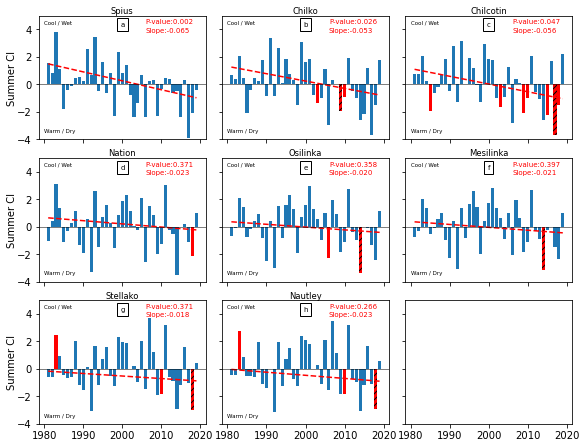

In [2]:
Watersheds=['Spius','Chilko','Chilcotin','Nation','Osilinka','Mesilinka','Stellako','Nautley']

#Season to display
S='Su'

#--------------------------------------initiate plotting ---------------------------------------------------------
xi=[0,0,0,1,1,1,2,2,2]
yi=[0,1,2,0,1,2,0,1,2]

def cm2inch(*tupl):### plots in cm 
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

L=['a','b','c','d','e','f','g','h']
fig,ax=plt.subplots(3,3,figsize=cm2inch(20,16),sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.05, top=0.95, hspace=0.15, left=0.05, right=0.99, wspace=0.1)

font = {'family' : 'sans-serif', 'weight' : 'normal',  'size'   : 7}
plt.rc('font', **font)



for count,WS in enumerate(Watersheds):
    #import Fire and Climate index data
    CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)
    ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
    
    # Calculate the climate index from NPA and NTA
    G= CI[CI.Season==S].NPA-CI[CI.Season==S].NTA

    # Determine years of large forest fires  (>25km2 and >5% of area burned)
    Fire_Years= ECA[(ECA.Tot_Area_Burned>25)&(ECA.Year>1981)].Year.values
    Large_Fire= ECA[(ECA.Percent>5)&(ECA.Year>1981)].Year.values
    
    # Pulls climate index for fire years
    Fire_Years_G=[];Fire_Year_Large=[]
    for yc in Fire_Years:
        Fire_Years_G.append((CI[(CI.Season==S)&(CI.Year==yc)].NPA-CI[(CI.Season==S) & (CI.Year==yc)].NTA).values[0])

    for yc in Large_Fire:
        Fire_Year_Large.append((CI[(CI.Season==S)&(CI.Year==yc)].NPA-CI[(CI.Season==S) & (CI.Year==yc)].NTA).values[0])
    
    # select subplot
    x=xi[count];y=yi[count]
    
    #plot climate index by year
    ax[x,y].bar(CI[CI.Season==S].Year,G)

    # MK testing
    MK_T=mk.original_test(G,alpha=0.10)
    T_slope,T_intercept, T_low, T_up= theilslopes(G,CI[CI.Season==S].Year.values)
    
    #plotting MK results
    ax[x,y].plot(CI[CI.Season==S].Year,T_slope*CI[CI.Season==S].Year+T_intercept, color='r', linestyle='--',linewidth=1.5)
    inter= -T_intercept/T_slope
    
    #recording p-value and slope
    ax[x,y].annotate('P-value:%.03f'%MK_T.p,(2006,4.4), xycoords='data', color='r')
    ax[x,y].annotate('Slope:%.03f'%T_slope,(2006,3.8), xycoords='data', color='r')

    #plot fire years where fires >25km2
    if len(Fire_Years)>0:
        ax[x,y].bar(Fire_Years,np.array(Fire_Years_G), color='r')
    
    #plot fire years where >5% area burned
    if len(Large_Fire)>0:
        ax[x,y].bar(Large_Fire,np.array(Fire_Year_Large), color='r',hatch='////')

    #annotate 
    ax[x,y].annotate('Cool / Wet',(1980,4.4), xycoords='data', color='k',size=5.5)  
    ax[x,y].annotate('Warm / Dry',(1980,-3.5), xycoords='data', color='k',size=5.5)  
        
    #plot properties
    ax[x,y].axhline(0, color='k',linewidth=0.5)
    ax[x,y].set_title(WS,pad=2)
    ax[x,y].set_ylim(-4,5)
    if y==0:
        ax[x,y].set_ylabel('Summer CI', labelpad=0.1)
     
    #label with letters
    at = AnchoredText(L[count], prop=dict(size=7), frameon=True, loc='upper center')
    at.patch.set_boxstyle("Square,pad=0.10")
    ax[x,y].add_artist(at)

#saving plots
Path_Figs='C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/'
fig.savefig(Path_Figs+'Figure2.eps',dpi=700)


### Summary of forest fire events

In [3]:
#watersheds and area
Watersheds=['Chilko','Chilcotin','Osilinka','Mesilinka','Stellako','Nautley'] #['Spius','Nation']
Area=[6800,19200,1950,3060,4020,6552] # [775,6790]

#season 
S='Su'

#Initilize results
Results=pd.DataFrame({'Watershed':[],'Year':[],'Percent Burned':[],'Area Burned':[]})

for count,WS in enumerate(Watersheds):
    
    #read fire summary and climate index 
    ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
    CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)

    Fire_Years= ECA[(ECA.Percent>5)].Year.values

    #summarize large forest fires and climate
    Fire_Years_CI=[]; ECA_Fire=[]
    for yc in Fire_Years:
        
        #define summer CI
        Summer_CI=(CI[(CI.Season==S)&(CI.Year==(yc))].NPA-CI[(CI.Season==S) & (CI.Year==(yc))].NTA).values[0]
        
        #percent burned
        ECA_Fire_per=ECA[ECA.Year==(yc)].Percent.values[0]
        
        #area burned
        Area_Burned=ECA[ECA.Year==(yc)].Tot_Area_Burned.values[0]
        
        #result
        Results=Results.append({'Watershed':WS,'Year':yc,'Percent Burned':ECA_Fire_per,
                                'Area Burned':Area_Burned,'Summer CI':Summer_CI},ignore_index=True)
        
Results  

,Watershed,Year,Percent Burned,Area Burned,Summer CI
0,Chilko,2009.0,9.46,650.57,-1.939453
1,Chilcotin,2017.0,13.10,2522.78,-3.715910
2,Osilinka,2014.0,5.82,112.18,-3.400021
3,Mesilinka,2014.0,16.90,505.00,-3.178733
4,Stellako,2018.0,27.41,1102.02,-3.030798
5,Nautley,2018.0,25.53,1673.00,-2.936051


### Climate Index vs. forest fire size trends

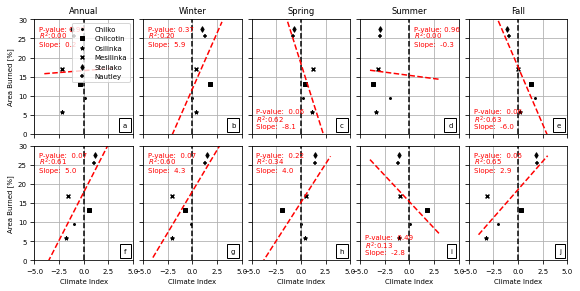

In [45]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy import stats

#initilize loop arrays
Watersheds=['Chilko','Chilcotin','Osilinka','Mesilinka','Stellako','Nautley'] #['Spius','Nation']
Area=[6800,19200,1950,3060,4020,6552] # [775,6790]
Seasons=['A','W','Sp','Su','F']
S_Name=['Annual','Winter','Spring','Summer','Fall']

#----------------------------initilize plotting formatting-----------------------------------------------
marker=['.','s','*','x','d','+','X','o']
L=['a','b','c','d','e','f','g','h','i','j']

def cm2inch(*tupl):### plots in cm 
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

fig,ax=plt.subplots(2,5,figsize=cm2inch(20,10),sharex=True, sharey=True)
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.1, left=0.05, right=0.99, wspace=0.1)

font = {'family' : 'sans-serif', 'weight' : 'normal',  'size'   : 7}
plt.rc('font', **font)


#----------------------------Analysis-----------------------------------------------------------------------

#change is how many years before the forest fires were are looking at
for C, change in enumerate([0,1]):
    
    # initilize arrays
    SES_FIRE=[];SES_CLIM_IX=[];Avg=[]
    Name_count=0
    
    #loop through seasons
    for S in Seasons:
        count=0
        CLIM_IX=[];FIRE=[];
        
        #loop through watersheds
        for WS in Watersheds:
            
            #read in climate index and fire summary
            CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)
            ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)
            
            #extract years where fires burned >5% area
            Fire_Years= ECA[(ECA.Percent>5)].Year.values
            
            #extract climate index and burn percentages for years where forest fires occur
            Fire_Years_CI=[]; ECA_Fire=[]
            for yc in Fire_Years:
                Fire_Years_CI.append((CI[(CI.Season==S)&(CI.Year==(yc-change))].NPA-CI[(CI.Season==S) & (CI.Year==(yc-change))].NTA).values[0])
                ECA_Fire.append(ECA[ECA.Year==(yc)].Percent.values[0])
            
            #create scatter plot: CI vs. fire size
            ax[change,Name_count].scatter(Fire_Years_CI, ECA_Fire, marker=marker[count], label=WS, color='k',s=15)
            count=count+1
            
            #save fire CI and Fire size
            CLIM_IX.append(Fire_Years_CI)
            FIRE.append(ECA_Fire)
            
        
        #----------------------------- plot formatting------------------------------
        if change==1:
            ax[change,Name_count].set_xlabel('Climate Index')
            
        if Name_count==0:
            ax[change,Name_count].set_ylabel('Area Burned [%]')
            
        if (Name_count==0)&(change==0):
            ax[change,Name_count].legend(loc='upper right')
            
        if change==0:
            ax[change,Name_count].set_title(S_Name[Name_count])
            
        ax[change,Name_count].set_xlim(-5,5)
        
        ax[change,Name_count].tick_params(axis='both', which='major')

        ax[change,Name_count].tick_params(which='both', length=4)
        
        ax[change,Name_count].grid(axis='both')

        ax[change,Name_count].axvline(0, color='k',linestyle='--')

        ax[change,Name_count].set_ylim(0,30)
        
        Name_count=Name_count+1


        # Seasonal Climate index and forest fire size info
        SES_CLIM_IX.append(np.concatenate(CLIM_IX))
        SES_FIRE.append(np.concatenate(FIRE))

    #------------------------------------linear regression--------------------------------------------
    for i in range(5):
        slope, intercept, r_value, p_value, std_err = stats.linregress(SES_CLIM_IX[i],SES_FIRE[i])
        
        ax[change,i].plot(np.arange(-4,4),slope*np.arange(-4,4)+intercept, color='r',linestyle='--')
        
        #---------------------------------Annotate linear regression results-------------------------
        if change==0:
            if (i==0)|(i==1):
                ax[change,i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,25), xycoords='data', color='r')
                ax[change,i].annotate('Slope:  %.01f'%slope, (-4.5,23), xycoords='data',  color='r')
                ax[change,i].annotate('P-value: %.02f'%p_value, (-4.5,27), xycoords='data', color='r') 
            elif i==3:
                ax[change,i].annotate('$R^2$:%.02f'%(r_value**2),(0.5,25), xycoords='data',  color='r')
                ax[change,i].annotate('Slope:  %.01f'%slope, (0.5,23), xycoords='data',  color='r')
                ax[change,i].annotate('P-value: %.02f'%p_value, (0.5,27), xycoords='data',  color='r')
            else:
                ax[change,i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,3), xycoords='data',  color='r')
                ax[change,i].annotate('Slope:  %.01f'%slope, (-4.5,1.5), xycoords='data',  color='r')
                ax[change,i].annotate('P-value:  %.02f'%p_value, (-4.5,5.5), xycoords='data',  color='r')
        if change ==1:
            if i!=3:
                ax[change,i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,25), xycoords='data',  color='r')
                ax[change,i].annotate('Slope:  %.01f'%slope, (-4.5,23), xycoords='data',  color='r')
                ax[change,i].annotate('P-value:  %.02f'%p_value, (-4.5,27), xycoords='data',  color='r')
            else:
                ax[change,i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,3), xycoords='data',  color='r')
                ax[change,i].annotate('Slope:  %.01f'%slope, (-4.5,1.5), xycoords='data',  color='r')
                ax[change,i].annotate('P-value:  %.02f'%p_value, (-4.5,5.5), xycoords='data',color='r')
        
        # plotting letter identifiers
        at = AnchoredText(L[C], prop=dict(size=7), frameon=True, loc='lower right')
        at.patch.set_boxstyle("Square,pad=0.15")
        ax[change,i].add_artist(at)
        
#saving figures
Path_Figs='C:/Users/margo.DESKTOP-T66VM01/Desktop/UNBC/Writting_Drafts/Manuscripts_for_submission/Figures/'
fig.savefig(Path_Figs+'Figure3.pdf',dpi=700)


###  1 panel version of CI vs.  forest fire size plot

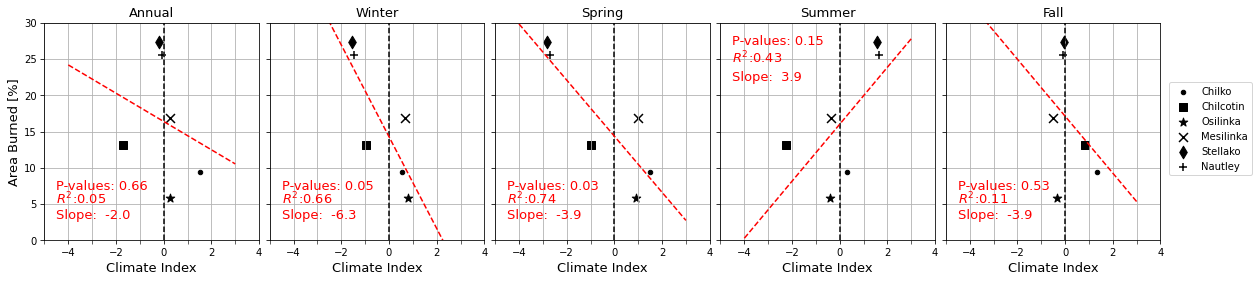

In [5]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

#initiate loop arrays
Watersheds=['Chilko','Chilcotin','Osilinka','Mesilinka','Stellako','Nautley'] #['Spius','Nation']
Area=[6800,19200,1950,3060,4020,6552] # [775,6790]
Seasons=['A','W','Sp','Su','F']
S_Name=['Annual','Winter','Spring','Summer','Fall']
marker=['.','s','*','x','d','+','X','o']

#initiate plotting
fig,ax=plt.subplots(1,5,figsize=(20,4),sharey='all',sharex='all')
plt.subplots_adjust(wspace=.05, hspace=.09)

SES_FIRE=[];SES_CLIM_IX=[]
Name_count=0

#loops through seasons
for S in Seasons:
    count=0
    CLIM_IX=[];FIRE=[]
    
    #loops through watershed
    for WS in Watersheds:
        
        #load cliamte and forest fire data
        CI= pd.read_excel('D:/UNBC/HydroMet_Project/Data/ERA5_land/ERA5_land_Climate_Index.xlsx', sheet_name=WS)
        ECA = pd.read_csv('D:/UNBC/HydroMet_Project/Data/ForestFires/Fire_Summary/%s.csv'%WS)

        #extract forest fire years
        Fire_Years= ECA[(ECA.Percent>5)].Year.values

        
        Fire_Years_CI=[]; ECA_Fire=[]
        for yc in Fire_Years:
            #extract climate index two years before forest fire
            Fire_Years_CI.append((CI[(CI.Season==S)&(CI.Year==(yc-2))].NPA-CI[(CI.Season==S) & (CI.Year==(yc-2))].NTA).values[0])
            
            #extract forest fire size
            ECA_Fire.append(ECA[ECA.Year==(yc)].Percent.values[0])
        
        #plot two years prior CI and forest fire size
        ax[Name_count].scatter(Fire_Years_CI, ECA_Fire, marker=marker[count], label=WS, color='k',s=80)
        count=count+1

        #save forest fire CI and size
        CLIM_IX.append(Fire_Years_CI)
        FIRE.append(ECA_Fire)

    #plot formatting
    ax[Name_count].set_xlabel('Climate Index', size=13)
    if Name_count==0:
        ax[Name_count].set_ylabel('Area Burned [%]',size=13)
    if (Name_count==4):
        ax[Name_count].legend(bbox_to_anchor=(1.45,.75))

    ax[Name_count].set_title(S_Name[Name_count], size=13)
    ax[Name_count].set_xlim(-5,4)
    ax[Name_count].tick_params(axis='both', which='major', labelsize=10)
    ax[Name_count].xaxis.set_minor_locator(MultipleLocator(1))
    ax[Name_count].tick_params(which='both', length=4)
    ax[Name_count].grid(axis='both')
    ax[Name_count].grid(axis='x',which='minor')
    ax[Name_count].axvline(0, color='k',linestyle='--')

    ax[Name_count].set_ylim(0,30)
    Name_count=Name_count+1



    SES_CLIM_IX.append(np.concatenate(CLIM_IX))
    SES_FIRE.append(np.concatenate(FIRE))

#linear regression for each season
for i in range(5):
    from scipy import stats
    
    #linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(SES_CLIM_IX[i],SES_FIRE[i])

    #plotting linear regression
    ax[i].plot(np.arange(-4,4),slope*np.arange(-4,4)+intercept, color='r',linestyle='--')
    
    #annotating linear regression results
    if i== 3:
        ax[i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,24.5), xycoords='data', size=13, color='r')
        ax[i].annotate('Slope:  %.01f'%slope, (-4.5,22), xycoords='data', size=13, color='r')
        ax[i].annotate('P-values: %.02f'%p_value, (-4.5,27), xycoords='data', size=13, color='r')

    else:
        ax[i].annotate('$R^2$:%.02f'%(r_value**2),(-4.5,5), xycoords='data', size=13, color='r')
        ax[i].annotate('Slope:  %.01f'%slope, (-4.5,3), xycoords='data', size=13, color='r')
        ax[i].annotate('P-values: %.02f'%p_value, (-4.5,7), xycoords='data', size=13, color='r')
